## 문제1) 테이블 피봇화하여 분석하기

In [1]:
import pandas as pd
import seaborn as sns

#### 펭귄 세 종의 분류 데이터 테이블 로드

In [2]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### 수치 데이터 연산을 위해 결측값 드랍

In [10]:
df2 = df.dropna()
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### 몸무게 평균값으로 피봇테이블화
* 행 정보 : 펭귄 종
* 열 정보 : 성별
* 값 데이터 : 몸무게 평균

In [15]:
df_pt = df2.pivot_table(index='species', columns='sex', values='body_mass_g', aggfunc='mean')

In [16]:
df_pt

sex,Female,Male
species,,
Adelie,3368.835616,4043.493151
Chinstrap,3527.205882,3938.970588
Gentoo,4679.741379,5484.836066


#### 피봇테이블 분석
* Gentoo 펭귄이 가장 큰 개체이다
* 평균적으로 암컷보다 수컷이 크다

#### Gentto image
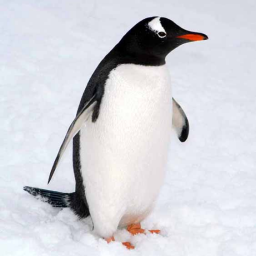

---

#### 개체의 성별 카운터를 위해 미분류 데이터 처리

In [19]:
df['sex'].isnull().sum() # 11개의 결측값 확인

11

In [31]:
df['sex'].fillna('unknown',inplace=True) # 결측값을 unknown 성별불명 으로 처리

In [39]:
df[['sex']]

,sex
0,Male
1,Female
2,Female
3,unknown
4,Female
...,...
339,unknown
340,Female
341,Male
342,Female


#### 개체 수 데이터로 피봇테이블화
* 행 정보 : 서식지
* 열 정보 : 펭귄 종
* 값 데이터 : 성별 개수

In [37]:
df_pt2 = df.pivot_table(index='island', columns='species', values='sex', aggfunc='count')

In [38]:
df_pt2

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44.0,NaN,124.0
Dream,56.0,68.0,NaN
Torgersen,52.0,NaN,NaN


#### 피봇테이블 분석
* Gentoo 펭귄은 Biscoe 에서 124개체가 서식한다
* Chinstrap 펭귄은 Dream island 에서 68개체가 서식한다
* 아델리 펭귄은 여러 지역에서 서식하는 것으로 관측된다